![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Artificial Intelligence for Business Decisions and Transformation 
&nbsp; 

CSCN8030 - Spring 2024 - Section 2
&nbsp; 

Professor: Glaucia Melo dos Santos, PhD
&nbsp;

Group 4 - Members:<br>

Krishna Kumar, Hemasree<br>
Shijin, Jency<br>
Fernandez, Arcadio<br>

## **Sprint 5  Development:**

# **Project: TikTok - User Interest Profiling for TikTok Users Based on Review Text Analysis**

## **Project Overview:**

This project aims to develop a comprehensive system to profile TikTok users based on their app review texts. By analyzing the textual content of user reviews, we intend to categorize users into specific interest groups such as Entertainment Enthusiasts, Educational Seekers, Lifestyle Admirers, and more. The ultimate goal is to provide insights into user preferences, which can be leveraged for personalized content recommendations, targeted marketing, and improving user engagement on the platform.

1. **TikTok Profiles Dataset:**

    This dataset contains various attributes related to TikTok user profiles. The key columns in this dataset are:

    **timestamp:** The date and time when the data was collected.

    **account_id:** A unique identifier for each TikTok user account.

    **nickname:** The display name of the user.

    **biography:** The bio section of the user's profile, where they describe themselves.

    **awg_engagement_rate:** The average engagement rate for the user's content.

    **comment_engagement_rate:** The engagement rate based on comments.

    **like_engagement_rate:** The engagement rate based on likes.

    **bio_link:** A URL link provided in the user's bio.

    **is_verified:** A boolean indicating if the user is verified.

    **followers:** The number of followers the user has.

    **following:** The number of accounts the user is following.

    **likes:** The total number of likes received by the user's content.

    **videos_count:** The number of videos uploaded by the user.

    **create_time:** The account creation date and time.

    **id:** A secondary identifier for the user.

    **top_videos:** Links or identifiers to the user's top videos.

    **url:** The URL to the user's profile.

    **profile_pic_url:** The URL to the user's profile picture.

2. **TikTok App Reviews Dataset:**

    This dataset includes user reviews for the TikTok app. The key columns in this dataset are:

    **review_id:** A unique identifier for each review.

    **review_text:** The textual content of the user's review.

    **upvotes:** The number of upvotes the review has received.

    **app_version:** The version of the TikTok app at the time of the review.

    **posted_date:** The date when the review was posted.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import nltk

In [2]:
df_tiktok_profiles = pd.read_csv('Data\TikTok profiles dataset.csv')
df_tiktok_app_reviews = pd.read_csv('Data\\tiktok_app_reviews.csv')

C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\3674976033.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tiktok_app_reviews = pd.read_csv('Data\\tiktok_app_reviews.csv')


In [3]:
display(df_tiktok_app_reviews)

,review_id,review_text,upvotes,app_version,posted_date
0,gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:23
1,gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:47
2,gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:34
3,gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:43
4,gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:02
...,...,...,...,...,...
3646471,gp:AOqpTOEEOr8NzYiOHyv78HwG4RtMidvhF0T8Av8cV94...,Nicr,0,NaN,2021-07-28 19:06:32
3646472,gp:AOqpTOGyGnaNxjtd_frHLZSSDEkRo80vUrqsZ1kaSk1...,wow,0,NaN,2019-05-06 03:59:08
3646473,gp:AOqpTOGxyWD7luZFV-i4ZMj-x6UWrVle67pnwx-Klzx...,tq,0,NaN,2019-04-11 09:20:53
3646474,gp:AOqpTOEdh8QQ3HTkcuZZPQnTLZTpk6d49pGB9_Zx0nO...,Owsm,0,NaN,2019-09-14 04:13:30


In [4]:
display(df_tiktok_profiles)

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-30,lpk.jp,Hinode Abadi Indonesia,Yayasan Hinode (SO)\nLembaga Pelatihan Bahasa ...,0.076391,0.004584,0.071807,NaN,False,956,294,4028,110,NaN,6950843413404435457,https://www.tiktok.com/@lpk.jp/video/726037681...,https://www.tiktok.com/@lpk.jp,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
996,2023-07-30,loup_32,loup _06.18,adore stanger thanks et Zepeto,0.463636,0.004545,0.459091,NaN,False,55,226,101,4,NaN,6893197159820297218,https://www.tiktok.com/@loup_32/video/71592449...,https://www.tiktok.com/@loup_32,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
997,2023-08-12,djbigkev,DJ_BigKev,"📍San Jose, CA\nGood Music & Good Vibes\n🎧🎶🎉\nI...",0.072184,0.001001,0.071183,https://soundcloud.com/user-176043326,False,12100,256,102400,89,NaN,6710967357261530117,https://www.tiktok.com/@djbigkev/video/7254431...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
998,2023-08-05,fakhrulnaim13,Fakhrul Naim,"Rezeki di sawah. Suami Jamilah Khalil, Ayah ke...",0.073662,0.003555,0.070107,NaN,False,2763,8059,18300,216,NaN,6880539217555358721,https://www.tiktok.com/@fakhrulnaim13/video/72...,https://www.tiktok.com/@fakhrulnaim13,https://p16-sign-useast2a.tiktokcdn.com/tos-us...


### 1. Perform Data integration by merging TikTok public user profiles and user reviews data by identifying common keys or fields.

    Data Integration cannot be done as there is no common key between the two datasets

### 2. Clean the data by handling missing values, correcting data types, and ensuring data consistency.


In [5]:
missing = pd.DataFrame(df_tiktok_profiles.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df_tiktok_profiles.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
3,biography,0.3
7,bio_link,80.9
13,create_time,100.0


In [6]:
df_tiktok_profiles.drop(columns=['create_time','bio_link'],inplace=True)

In [7]:
df_tiktok_profiles['biography'].fillna('No Bio', inplace=True)

In [8]:
missing = pd.DataFrame(df_tiktok_app_reviews.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df_tiktok_app_reviews.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
1,review_text,0.004470
3,app_version,27.239148


In [9]:
df_tiktok_app_reviews.dropna(inplace=True)

In [10]:
df_tiktok_profiles.drop_duplicates(inplace=True)
df_tiktok_app_reviews.drop_duplicates(inplace=True)

In [11]:
df_tiktok_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2653068 entries, 0 to 3171175
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   review_text  object
 2   upvotes      int64 
 3   app_version  object
 4   posted_date  object
dtypes: int64(1), object(4)
memory usage: 121.4+ MB


In [12]:
df_tiktok_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                1000 non-null   object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   is_verified              1000 non-null   bool   
 8   followers                1000 non-null   int64  
 9   following                1000 non-null   int64  
 10  likes                    1000 non-null   int64  
 11  videos_count             1000 non-null   int64  
 12  id                       1000 non-null   int64  
 13  top_videos               1000 non-null   object 
 14  url                      

### 3. Exploratory Data Analysis

In [13]:
df_tiktok_app_reviews_subset = df_tiktok_app_reviews.sample(frac=0.1, random_state=1)

In [14]:
df_tiktok_app_reviews_subset

,review_id,review_text,upvotes,app_version,posted_date
886099,gp:AOqpTOFS8c4CjlxhB8CccTQcNUNVc_Pss2jviTDzcfD...,superb app superb app,0,11.0.3,2019-05-01 10:34:51
3102904,gp:AOqpTOFQOjsEm2BgRid9pWzSmBXNnseimSVO7h7j-HB...,Go follow me on musically it's - kattie.lemus,0,4.10.8,2016-08-12 00:37:40
2887288,gp:AOqpTOFKqDhKgZm6_WbSUtGxpTITqG2osp8JRGjWaP0...,Its just great,0,7.6.0,2018-07-24 23:54:39
973688,gp:AOqpTOGntRPMEBJU8a4h9NaNQvtAgRoi4MNJK2uvP7X...,Very funny app,1,9.1.0,2018-11-15 22:25:14
1988830,gp:AOqpTOEHe0Q0ruiZm_VL3XzrAq8pJquHaTD3agdvLZz...,Amazing,0,17.2.4,2020-08-10 12:30:50
...,...,...,...,...,...
209833,gp:AOqpTOH77_cOfTFQzptSV3OIogxOezGeVmtTqXQzKFV...,It's good .,0,20.0.5,2021-07-08 03:08:12
1999389,gp:AOqpTOHHXK4Jxx1PotpAVioVmtuKsC484tmt9PLH8i-...,Wait ver,0,16.6.43,2020-07-31 10:14:08
2995518,gp:AOqpTOH0ZQnPZpxosaXZ361LkI9SItwOZzrL3AmIUhu...,I love at,0,5.7.3,2017-06-29 22:56:11
2164902,gp:AOqpTOGlMbnlS-ieRstsitD4DKeSEQ5D56uLYsmLQop...,I rlly like tiktok bc it lets you meet new ppl...,0,15.5.4,2020-03-31 10:06:22


In [15]:

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to review_text
df_tiktok_app_reviews_subset['sentiment'] = df_tiktok_app_reviews_subset['review_text'].apply(lambda x: get_sentiment(str(x)))

In [16]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_tiktok_app_reviews_subset['sentiment_class'] = df_tiktok_app_reviews_subset['sentiment'].apply(categorize_sentiment)

In [17]:
# Count the occurrences of each sentiment category
sentiment_counts = df_tiktok_app_reviews_subset['sentiment_class'].value_counts()

In [18]:
sentiment_counts

sentiment_class
Positive    189430
Neutral      70943
Negative      4934
Name: count, dtype: int64

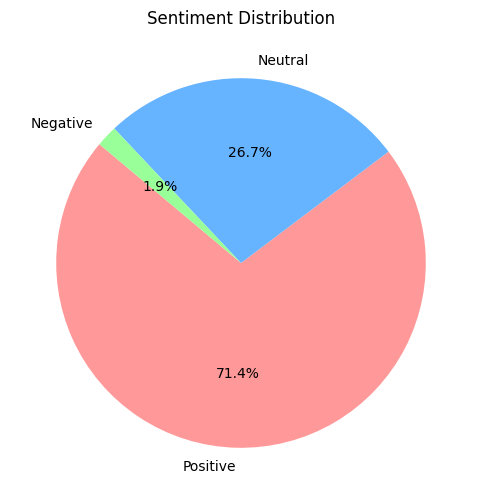

In [19]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()

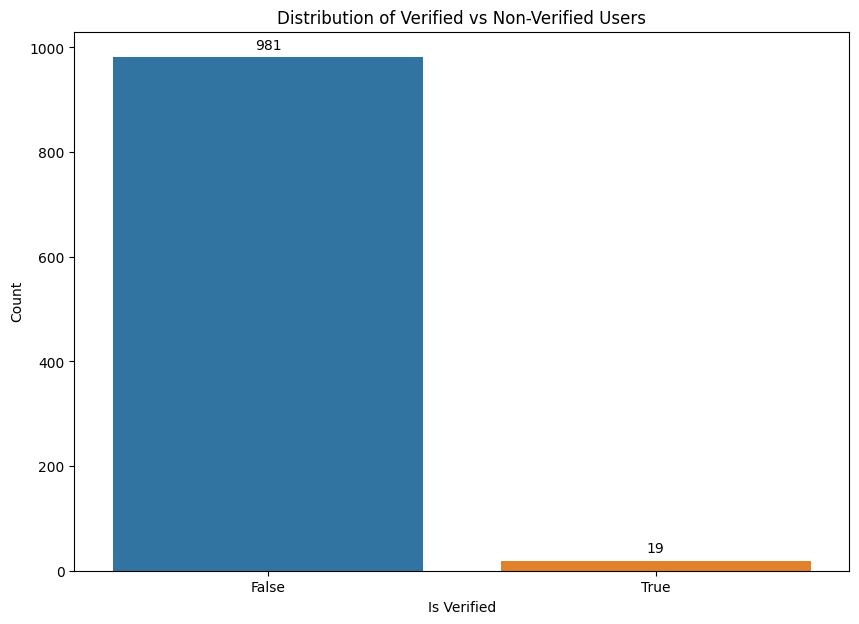

In [20]:
# Distribution of verified vs non-verified users
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='is_verified', data=df_tiktok_profiles)
# Get counts for annotations
counts = df_tiktok_profiles['is_verified'].value_counts()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height +10, int(height), ha='center', va='bottom')

# Set title and labels
plt.title('Distribution of Verified vs Non-Verified Users')
plt.xlabel('Is Verified')
plt.ylabel('Count')

# Show the plot
plt.show()

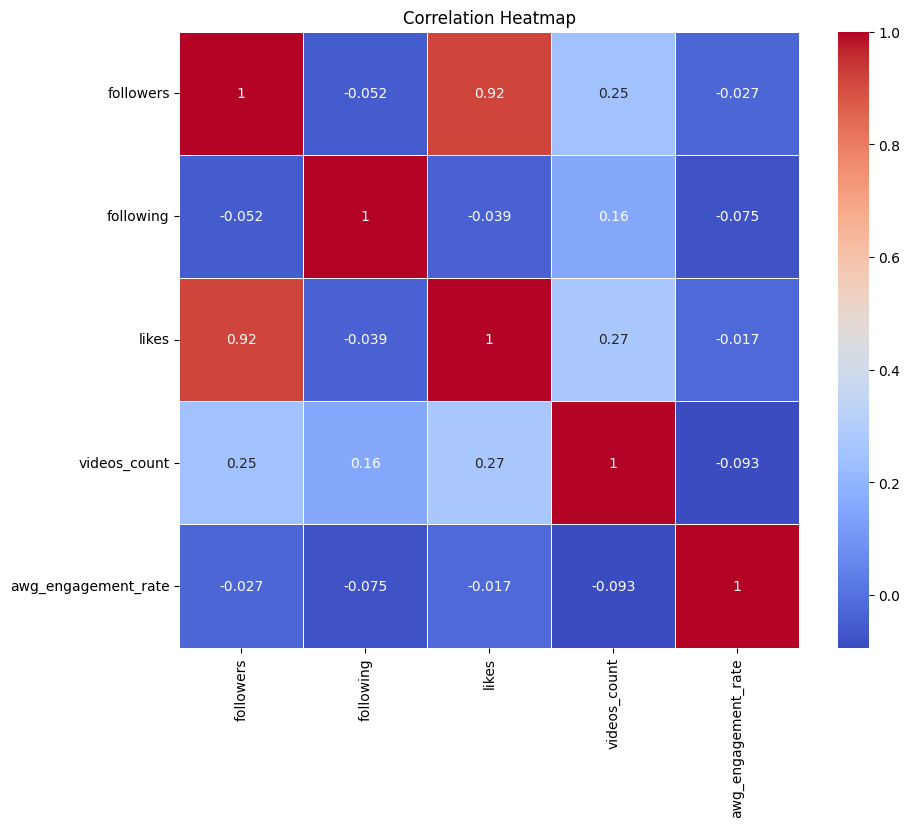

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_tiktok_profiles[['followers', 'following', 'likes', 'videos_count', 'awg_engagement_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 129730 (\N{PEOPLE HUGGING}) missing from current font.
  plt.tight_layout()
C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  plt.tight_layout()
C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from current font.
  plt.tight_layout()
C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  plt.tight_layout()
C:\Users\hemas\AppData\Local\Temp\ipykernel_25384\87893076.py:36: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from curren

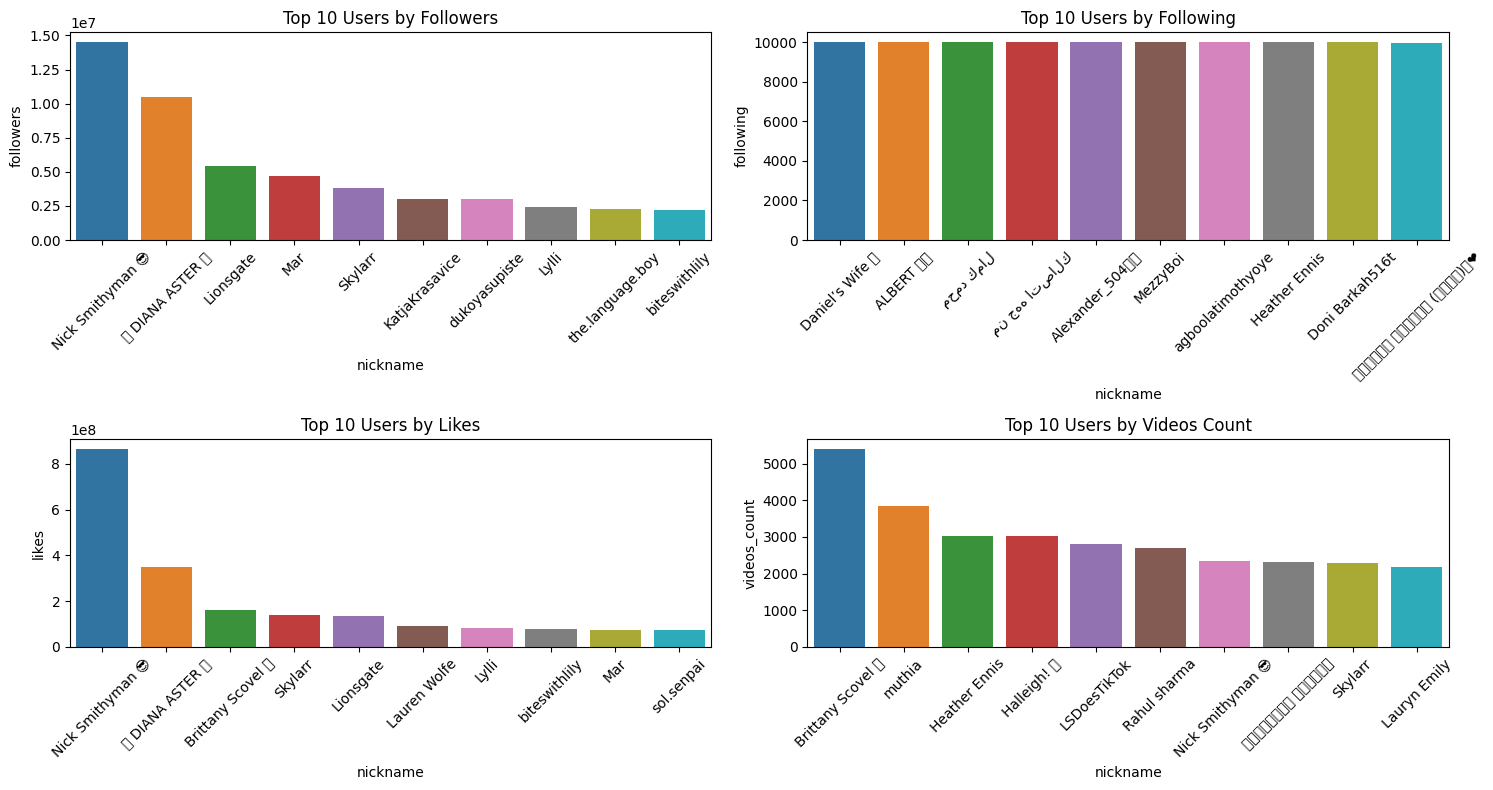

In [22]:
# Heatmap of top 10 users with most followers
top_10_users = df_tiktok_profiles.nlargest(10, 'followers')
# Set the figure size
plt.figure(figsize=(15, 8))

# Bar plot for followers
plt.subplot(2, 2, 1)
sns.barplot(x='nickname', y='followers', data=top_10_users)
plt.xticks(rotation=45)
plt.title('Top 10 Users by Followers')

top_10_users = df_tiktok_profiles.nlargest(10, 'following')

# Bar plot for following
plt.subplot(2, 2, 2)
sns.barplot(x='nickname', y='following', data=top_10_users)
plt.xticks(rotation=45)
plt.title('Top 10 Users by Following')

top_10_users = df_tiktok_profiles.nlargest(10, 'likes')

# Bar plot for likes
plt.subplot(2, 2, 3)
sns.barplot(x='nickname', y='likes', data=top_10_users)
plt.xticks(rotation=45)
plt.title('Top 10 Users by Likes')

top_10_users = df_tiktok_profiles.nlargest(10, 'videos_count')

# Bar plot for videos count
plt.subplot(2, 2, 4)
sns.barplot(x='nickname', y='videos_count', data=top_10_users)
plt.xticks(rotation=45)
plt.title('Top 10 Users by Videos Count')

plt.tight_layout()
plt.show()

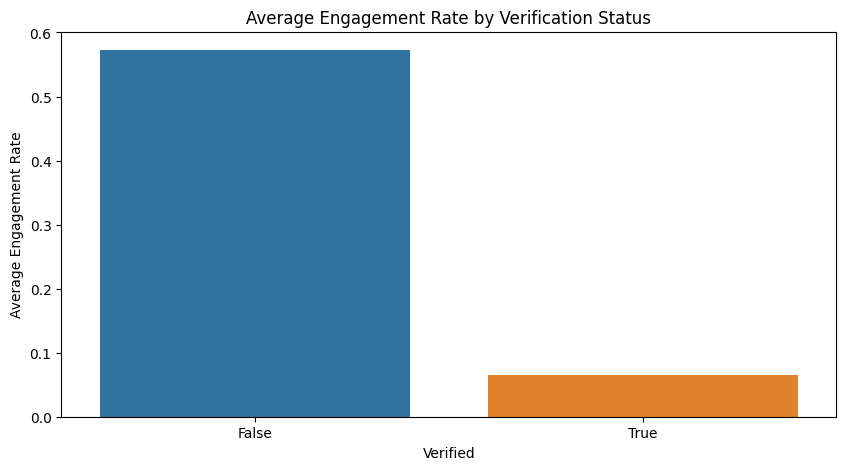

In [23]:
# Bar plot of average engagement rate by verification status
plt.figure(figsize=(10, 5))
avg_engagement_rate = df_tiktok_profiles.groupby('is_verified')['awg_engagement_rate'].mean().reset_index()
sns.barplot(x='is_verified', y='awg_engagement_rate', data=avg_engagement_rate)
plt.title('Average Engagement Rate by Verification Status')
plt.xlabel('Verified')
plt.ylabel('Average Engagement Rate')
plt.show()

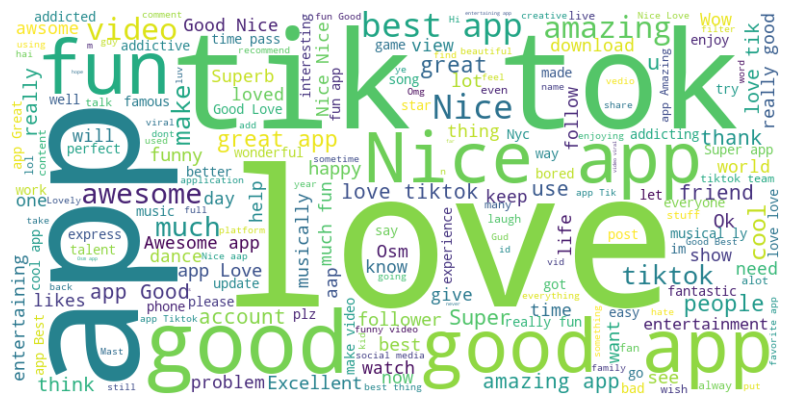

In [24]:
from wordcloud import WordCloud

# Combine all review texts
text = ' '.join(df_tiktok_app_reviews_subset['review_text'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4. Preprocess the user reviews or any other text data by cleaning, tokenizing, lemmatizing, and removing stop words.


In [25]:
# Updated dictionary of short forms and their expansions
short_form_dict = {
    "msg": "message",
    "txt": "text",
    "dm": "direct message",
    "u": "you",
    "ur": "your",
    "r": "are",
    "k": "okay",
    "omg": "oh my god",
    "idk": "I don't know",
    "brb": "be right back",
    "btw": "by the way",
    "gr8": "great",
    "b4": "before",
    "pls": "please",
    "plz": "please",
    "thx": "thanks",
    "thxs": "thanks",
    "be coz": "because",
    "ty": "thank you",
    "y": "why",
    "cya": "see you",
    "ttyl": "talk to you later",
    "imo": "in my opinion",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "bff": "best friends forever",
    "lol": "laugh out loud",
    "np": "no problem",
    "smh": "shaking my head",
    "tq": "thank you",
    "owsm": "awesome",
    "wow": "wow",
    "nicr": "nice",
    "ppl": "people",
    "bc": "because"
    # Add more short forms as needed
}

# Function to expand short forms
def expand_short_forms(text, short_form_dict):
    words = text.split()
    expanded_words = [short_form_dict.get(word.lower(), word) for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Function to remove emojis
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Function to remove hashtags and mentions
def remove_hashtags_mentions(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    return text
    
    return preprocessed_text

In [26]:
# Function to clean and preprocess text
def preprocess_text(text, short_form_dict,words_to_keep):
    # Expand contractions
    text = contractions.fix(text)
    
    # Expand short forms
    text = expand_short_forms(text, short_form_dict)
    
    # Remove emojis
    text = remove_emojis(text)
    
    # Remove hashtags and mentions
    text = remove_hashtags_mentions(text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation but keep numbers
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Custom stopwords list
    stop_words = set(stopwords.words('english'))
    
    # Add words_to_keep to the stopwords list
    stop_words = stop_words - set(words_to_keep)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [27]:
# Words to keep even if they are stopwords
words_to_keep = ["under", "over", "don't", "can't", "isn't", "aren't", "wasn't", "weren't"]

In [28]:
# Apply the preprocessing to the review_text column
df_tiktok_app_reviews_subset['preprocessed_review_text'] = df_tiktok_app_reviews_subset['review_text'].apply(lambda x: preprocess_text(str(x), short_form_dict,words_to_keep))

In [29]:
df_tiktok_profiles['preprocessed_biography'] = df_tiktok_profiles['biography'].apply(lambda x: preprocess_text(str(x), short_form_dict,words_to_keep))

In [30]:
df_tiktok_profiles['preprocessed_nickname'] = df_tiktok_profiles['nickname'].apply(lambda x: preprocess_text(str(x), short_form_dict,words_to_keep))

In [32]:
pip install transformers


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from transformers import pipeline

In [34]:
categories = ["education", "positive experience", "entertainment", "fitness", "comedy","gaming","pet lovers","Foodie","Lifestyle" "health", "art", "community", "technical issue", "networking"]

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Perform classification
df_tiktok_app_reviews_subset['predicted_category'] = df_tiktok_app_reviews_subset['review_text'].apply(lambda x: classifier(x, categories)['labels'][0])

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

c:\Users\hemas\Documents\Applied_AI_and_ML_Courses\Foundations_Of_ML\labs\CSCN8010\venv\CSCN8010_classic_ml3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hemas\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

KeyboardInterrupt: 